<h2 align =center > EDA </h2>

En este archivo revisaremos la data recien creada, si es necesario se harán transformaciones, eliminarán columnas, inputarán datos, para finalmente analizarlos y buscar patrones o tendencias.

#### Se importan las librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Tools as t
from summarytools import dfSummary
import warnings
warnings.filterwarnings('ignore')

<Figure size 640x480 with 0 Axes>

#### Los datos son ingestados en un dataframe de pandas

In [2]:
df = pd.read_csv('data/df_accidentes.csv')
df.head(5)

,idSiniestro,NumVictimas,Anio,Mes,Dia,H,LugarHecho,TipoDeCalle,Calle,Altura,...,PosX,PosY,Participantes,Victima,Acusado,DiaSemana,Rol,Sexo,Edad,FechaFallecimiento
0,2016-0001,1,2016,Enero,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,...,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,Viernes,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016,Enero,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,"PAZ, GRAL. AV.",NaN,...,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,Sábado,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016,Enero,3,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,...,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,Domingo,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016,Enero,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,...,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,Domingo,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,1,2016,Enero,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,...,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,Jueves,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00


In [3]:
df_poblacion = t.ExtraerPoblacion()
df_poblacion

,Anio,Poblacion
0,2016,"3,059,122"
1,2017,"3,063,728"
2,2018,"3,068,043"
3,2019,"3,072,029"
4,2020,"3,075,646"
5,2021,"3,078,836"


#### Tipos de datos

El tipo de datos se modifica para ajustarse a las siguientes operaciones a realizar (de ser necesario).

In [4]:
t.DataType(df)

,TipoDeDato
idSiniestro,object
NumVictimas,int64
Anio,int64
Mes,object
Dia,int64
H,object
LugarHecho,object
TipoDeCalle,object
Calle,object
Altura,float64


Modificamos la columna H (horas) a numérico.

In [5]:
df['H'] = pd.to_numeric(df['H'], errors='coerce')        

In [6]:
df['Edad'].replace('SD', np.nan, inplace=True)                  # Reemplazamos 'SD' por nulos
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')         
df['Edad'] = df['Edad'].astype('float')

Ahora revisamos el dataframe de poblacion.

In [7]:
t.DataType(df_poblacion)

,TipoDeDato
Anio,int64
Poblacion,object


La columna de población necesita ser en formato de numero.

In [8]:
df_poblacion['Poblacion'] = df_poblacion['Poblacion'].replace(',','', regex = True)
df_poblacion

,Anio,Poblacion
0,2016,3059122
1,2017,3063728
2,2018,3068043
3,2019,3072029
4,2020,3075646
5,2021,3078836


In [9]:
df_poblacion['Poblacion'] = pd.to_numeric(df_poblacion['Poblacion'], errors='coerce')

#### Datos faltantes

##### Nulls

Los valores nulos se buscan en el dataframe con una función predefinida en el archivo Tools.py.

In [10]:
nulos = t.PorcentajeNulos(df)
nulos

,Data_Types,%_Null,Qty_Null,Qty_No_Null,Total_Registros
idSiniestro,object,0.00,0,717,717
NumVictimas,int64,0.00,0,717,717
Anio,int64,0.00,0,717,717
Mes,object,0.00,0,717,717
Dia,int64,0.00,0,717,717
H,float64,0.14,1,716,717
LugarHecho,object,0.00,0,717,717
TipoDeCalle,object,0.00,0,717,717
Calle,object,0.14,1,716,717
Altura,float64,81.45,584,133,717


In [11]:
#nan = t.ContarRegistros(df, 'nan')
#nan

Modificamos la cantidad de registros que se muestra en el output

In [12]:
pd.set_option('display.max_rows', None)                     # Establece el número máximo de filas y columnas a mostrar
pd.set_option('display.max_columns', None)                  # En este caso quiero que me muestre todo

###### Altura y cruce

Revisamos varios valores de Cruce nulos, y la dirección a la que está relacionada.

In [13]:
df[['LugarHecho','Calle','Cruce','DireccionNormalizada','Altura']].iloc[537]

LugarHecho              RIVADAVIA AV. Y PERGAMINO
Calle                               RIVADAVIA AV.
Cruce                                   PERGAMINO
DireccionNormalizada    RIVADAVIA AV. y PERGAMINO
Altura                                        NaN
Name: 537, dtype: object

In [14]:
df[['LugarHecho','Calle','Cruce','DireccionNormalizada','Altura']].iloc[418]

LugarHecho              Paz, Gral. Av. 11200
Calle                         PAZ, GRAL. AV.
Cruce                                    NaN
DireccionNormalizada    PAZ, GRAL. AV. 11200
Altura                               11200.0
Name: 418, dtype: object

In [15]:
df[['LugarHecho','Calle','Cruce','DireccionNormalizada','Altura']].iloc[156]

LugarHecho                  CORDOBA AV. Y CALLAO
Calle                                CORDOBA AV.
Cruce                                 CALLAO AV.
DireccionNormalizada    CORDOBA AV. y CALLAO AV.
Altura                                       NaN
Name: 156, dtype: object

In [16]:
df[['LugarHecho','Calle','Cruce','DireccionNormalizada','Altura']].iloc[6]

LugarHecho               NOGOYA Y JOAQUIN V. GONZALES
Calle                                          NOGOYA
Cruce                            GONZALEZ, JOAQUIN V.
DireccionNormalizada    NOGOYA y GONZALEZ, JOAQUIN V.
Altura                                            NaN
Name: 6, dtype: object

In [17]:
df[['LugarHecho','Calle','Cruce','DireccionNormalizada','Altura']].iloc[647]

LugarHecho               COREA AV. y TORRES Y TENORIO, PRES
Calle                                             COREA AV.
Cruce                               TORRES Y TENORIO, PRES.
DireccionNormalizada    COREA AV. y TORRES Y TENORIO, PRES.
Altura                                                  NaN
Name: 647, dtype: object

Tras comprobar algunos de los registros, podemos comprobar que si hay un Cruce, no hay Altura y viceversa. Por lo tanto, la columna de Alturá se eliminará y los registros nulos de Cruce, se modificarán por 'Sin cruce' y los registros con valores see cambiarán por 'Con cruce' para facilitar el análisis posterior.

In [18]:
df.drop('Altura', axis = 1, inplace = True)
#df['Cruce'] = df['Cruce'].replace('Sin Dato', 'Sin Cruce')
df['Cruce'] = df['Cruce'].fillna('Sin Cruce')
df['Cruce'] = np.where(df['Cruce'] != 'Sin Cruce', 'Con Cruce', df['Cruce'])
df['Cruce'].value_counts()

Cruce
Con Cruce    540
Sin Cruce    177
Name: count, dtype: int64

Por último, buscamos registros completos sin información (no necesariamente nulos).

In [19]:
mascara = ( (df['Cruce'].isnull())  | ( df['LugarHecho'] == 'SD' ) )
df[mascara]

,idSiniestro,NumVictimas,Anio,Mes,Dia,H,LugarHecho,TipoDeCalle,Calle,Cruce,DireccionNormalizada,Comuna,PosX,PosY,Participantes,Victima,Acusado,DiaSemana,Rol,Sexo,Edad,FechaFallecimiento
121,2016-0151,1,2016,Noviembre,18,20.0,SD,CALLE,NaN,Sin Cruce,NaN,0,.,.,PEATON-SD,PEATON,SD,Viernes,PEATON,SD,NaN,SD


###### DireccionNormalizada

Hay un 1,12% de nulos en la columna "DirecciónNormalizada", pero como se trata de la misma información que en la columna "LugarHecho" y esta columna está completa, se elimina la columna "DirecciónNormalizada".

In [20]:
df.drop('DireccionNormalizada', axis = 1, inplace = True)
df.head(2)

,idSiniestro,NumVictimas,Anio,Mes,Dia,H,LugarHecho,TipoDeCalle,Calle,Cruce,Comuna,PosX,PosY,Participantes,Victima,Acusado,DiaSemana,Rol,Sexo,Edad,FechaFallecimiento
0,2016-0001,1,2016,Enero,1,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,Con Cruce,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,Viernes,CONDUCTOR,MASCULINO,19.0,2016-01-01 00:00:00
1,2016-0002,1,2016,Enero,2,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,"PAZ, GRAL. AV.",Con Cruce,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,Sábado,CONDUCTOR,MASCULINO,70.0,2016-01-02 00:00:00


###### Sexo

Hay 5 registros sin información en la columna Sexo, como representa menos del 1% del total del dataframe, serán eliminados.

In [21]:
df.dropna(subset=['Sexo'], inplace=True)

Volvemos a revisar si hay mas nulos

In [22]:
nulos = t.PorcentajeNulos(df)
nulos

,Data_Types,%_Null,Qty_Null,Qty_No_Null,Total_Registros
idSiniestro,object,0.00,0,717,717
NumVictimas,int64,0.00,0,717,717
Anio,int64,0.00,0,717,717
Mes,object,0.00,0,717,717
Dia,int64,0.00,0,717,717
H,float64,0.14,1,716,717
LugarHecho,object,0.00,0,717,717
TipoDeCalle,object,0.00,0,717,717
Calle,object,0.14,1,716,717
Cruce,object,0.00,0,717,717


Parece que no quedan registros vacíos, pero se realiza una búsqueda más profunda para encontrar valores vacíos (no necesariamente nulos).

##### SD

Los registros también tienen 'SD' como forma de decir que no hay información, por lo que los contamos como nulos.

In [23]:
sindato = t.ContarRegistros(df, 'SD')
sindato

,Qty 'SD',%_of_SD,Total_Records
idSiniestro,0,0.00,717
NumVictimas,0,0.00,717
Anio,0,0.00,717
Mes,0,0.00,717
Dia,0,0.00,717
H,0,0.00,717
LugarHecho,1,0.14,717
TipoDeCalle,0,0.00,717
Calle,0,0.00,717
Cruce,0,0.00,717


Los datos que faltan se comprueban columna por columna. Dependiendo la información, se decide si se inputan valores o se eliminan.

Las columnas Acusado, Víctima y Rol con valores SD representan menos del 5% de los registros, por lo que se eliminan.

In [24]:
df = df.drop(df[df['Acusado'] == 'SD'].index)
df = df.drop(df[df['Victima'] == 'SD'].index)
df = df.drop(df[df['Rol'] == 'SD'].index)

###### Edad

La columna Edad tiene un 6,1% de SD, por lo que para imputar los registros que faltan, los registros nulos se rellenan con la media de la columna.

In [25]:
promedio = round(df['Edad'].mean(),0)
df['Edad'].fillna(promedio, inplace=True)

La columna de sexo tiene 0.84% de SD, por lo que los inputaremos como Masculinos.

In [26]:
df['Sexo'] = df['Sexo'].replace('SD','MASCULINO')

#### Valores duplicados

Se buscan valores duplicados en el dataframe.

In [27]:
filas_duplicadas = df.duplicated(keep=False)
df_duplicados = df[filas_duplicadas]
df_duplicados

,idSiniestro,NumVictimas,Anio,Mes,Dia,H,LugarHecho,TipoDeCalle,Calle,Cruce,Comuna,PosX,PosY,Participantes,Victima,Acusado,DiaSemana,Rol,Sexo,Edad,FechaFallecimiento


No se encuentran registros duplicados en el dataframe.

#### Outliers

Buscamos outliers en Edades y Años.

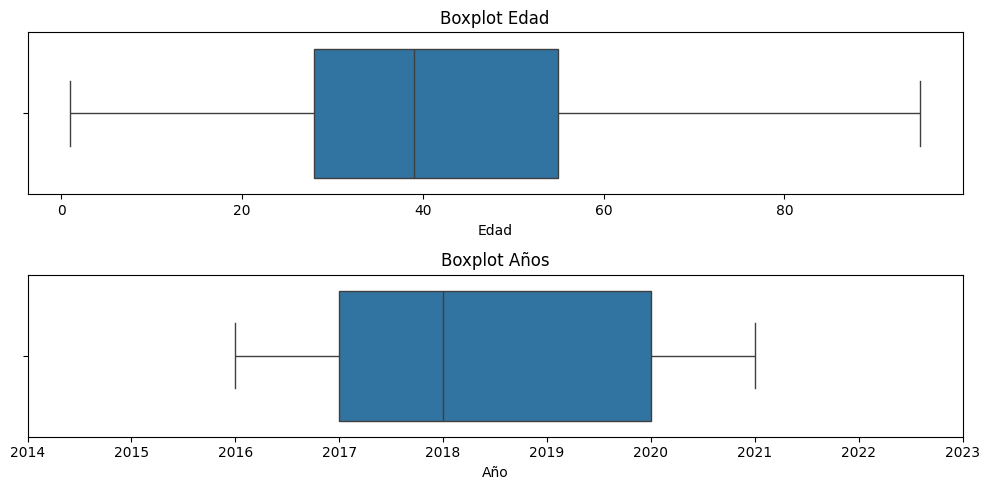

In [28]:
t.BoxplotEdadAnio(df)

En las graficas de previas se puede observar que la edad de las víctimas va de ~ 1 a 100 años y en promedio la edad de las victimas va de los ~ 25 a los 56 años, la mediana es de 40 años y no se observan outliers en esta variable.
Luego observamos el boxplot de los Años, los años presentes son del 2016 al 2021, y la mayor cantidad de muertes sucedieron en el 2018; no se observan outliers.

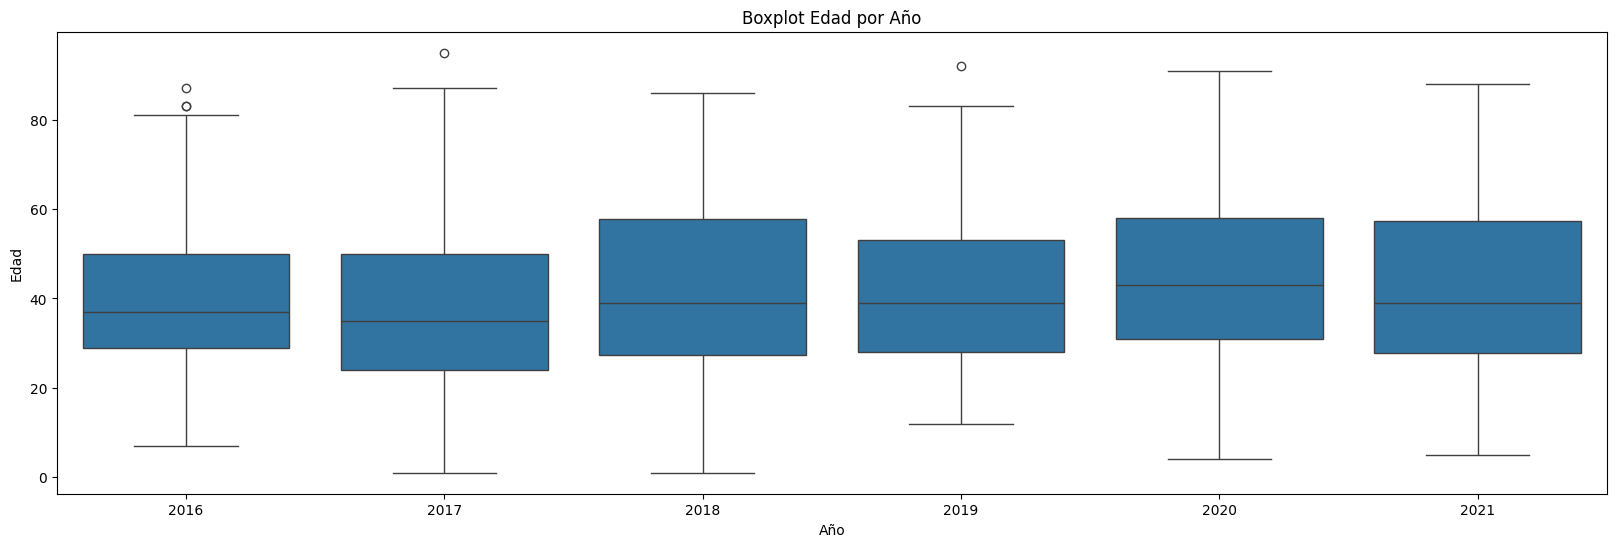

In [29]:
t.BoxplotEdadbyAnio(df)

Observamos las edades de las victimas por año, y podemos observar que se mantienen entre los 25 a 55 años, y si se observan algunos outliers en el 2016, 2017 y 2019. sin embargo por la cantidad limitada de registros con la que se cuenta, no se eliminarán.

También, para facilitar el calculo, dividiremos las horas del dia en 4 categorias: 
* Mañana(6am-12pm) 
* Tarde(12pm-6pm)
* Noche(6pm-12am)
* Madrugada(12am-6am) 

In [30]:
bins = [0, 6, 12, 18, 24]
labels = ['madrugada', 'mañana', 'tarde', 'noche']

df['RangoHorario'] = pd.cut(df['H'], bins=bins, labels=labels, right=False)

#### Analisis

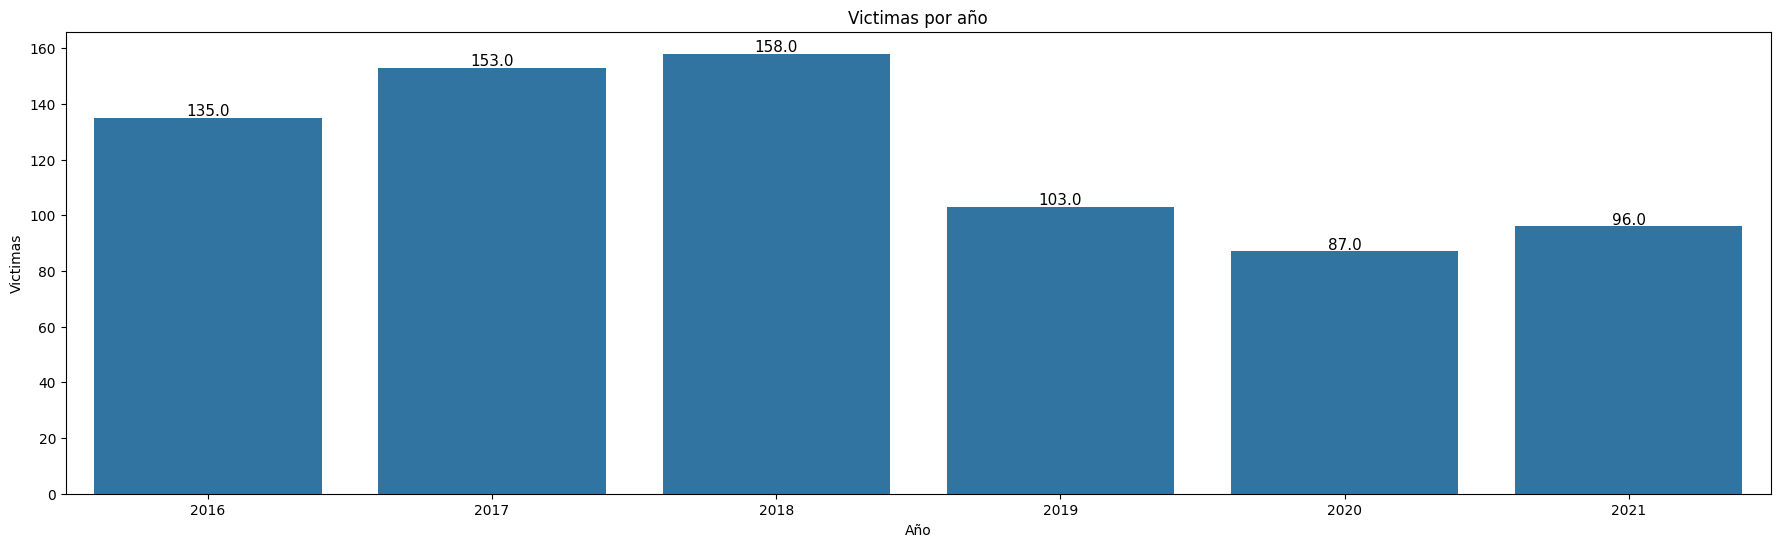

In [31]:
t.FallecimientosAnio(df)

En este gráfico podemos observar como el año que más victimas mortales tuvo fue el 2018 con 158, seguido del 2017 con 153 y el 2016 con 135. También podemos observar como apartir del 2019 la cantidad de accidentes disminuyó de manera considerable, pero despues del 2020 comenzó a aumentar nuevamente; esto probablemente debido al inicio y fin de la pandemia mundial por Covid-19.

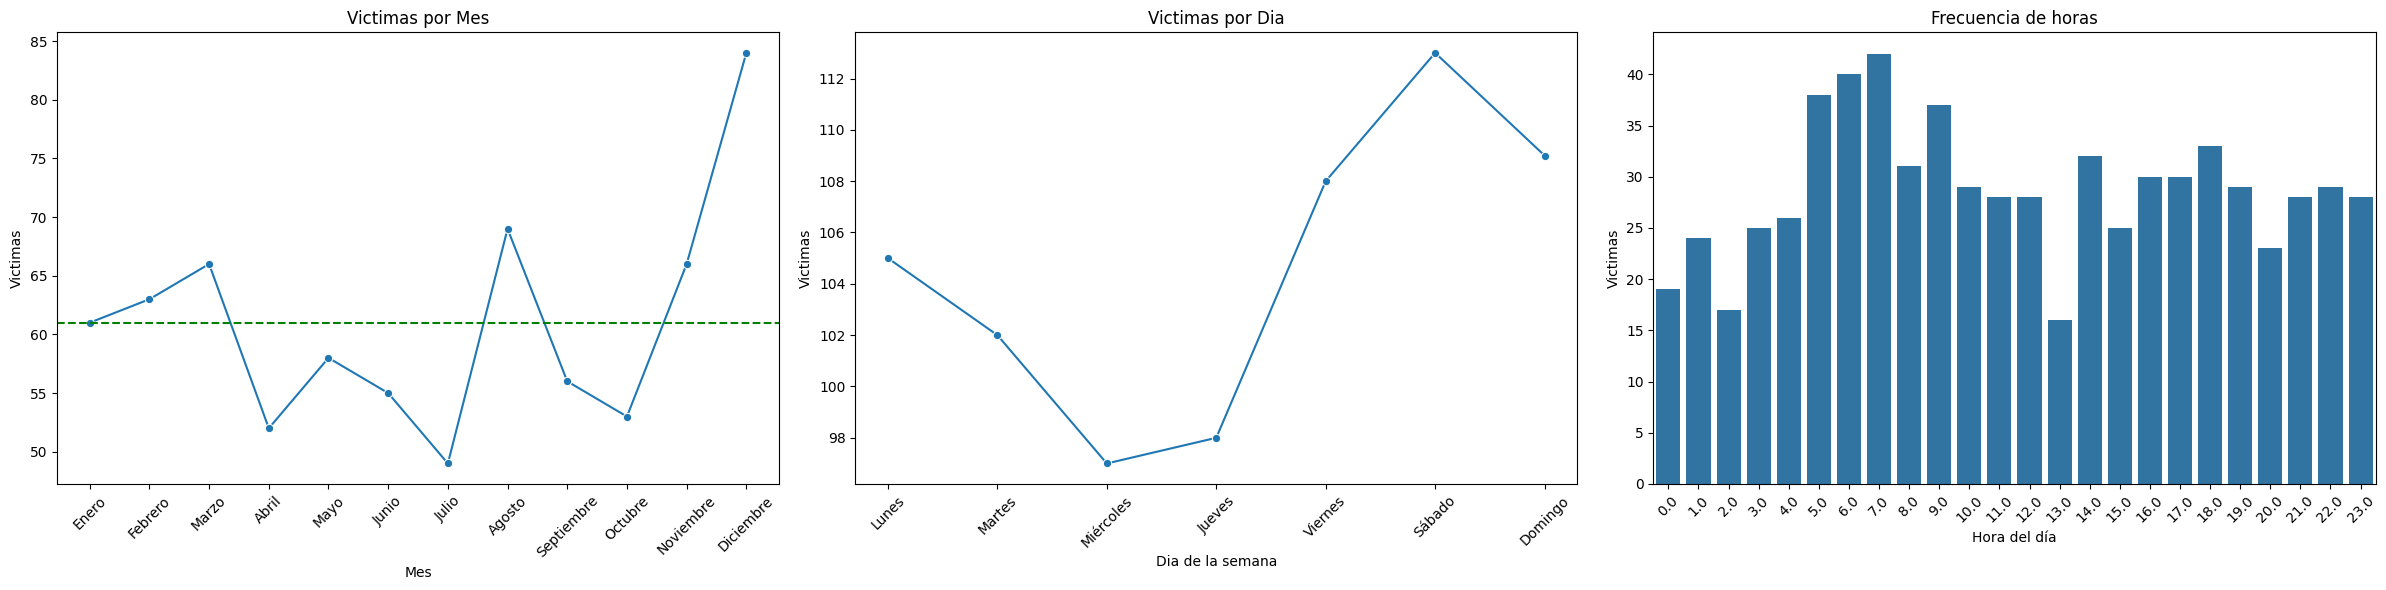

In [32]:
t.VictimaDiaAnio(df)

En las gráficas de arriba podemos observar la cantidad de victimas mortales por Mes (izquierda), por día de la semana (centro) y por hora (derecha) en que sucedió el siniestro. Podemos observar que el mes con mayor cantidad de fallecimientos fue Diciembre con 

En la gráfica de arriba podemos observar la cantidad de victimas mortales por Mes (izquierda), por día de la semana (centro) y por hora (derecha) en que sucedieron los siniestros. Podemos observar que el mes con la mayor cantidad de fallecimientos fue Diciembre con 84, cuando el promedio mensual de fallecimientos es de 61 (línea verde punteada). También Agosto y Marzo se observa la misma tendencia a la alta.

Continuando con la gráfica central, se observa que los días con mayor cantidad de víctimas son el sábado y domingo, con 113 y 109 fallecimientos respectivamente.

Terminamos el análisis temporal con la gráfica de la derecha, donde se observa que las horas con mayor cantidad de siniestros con victimas fatales son las 5, 6 y 7am.

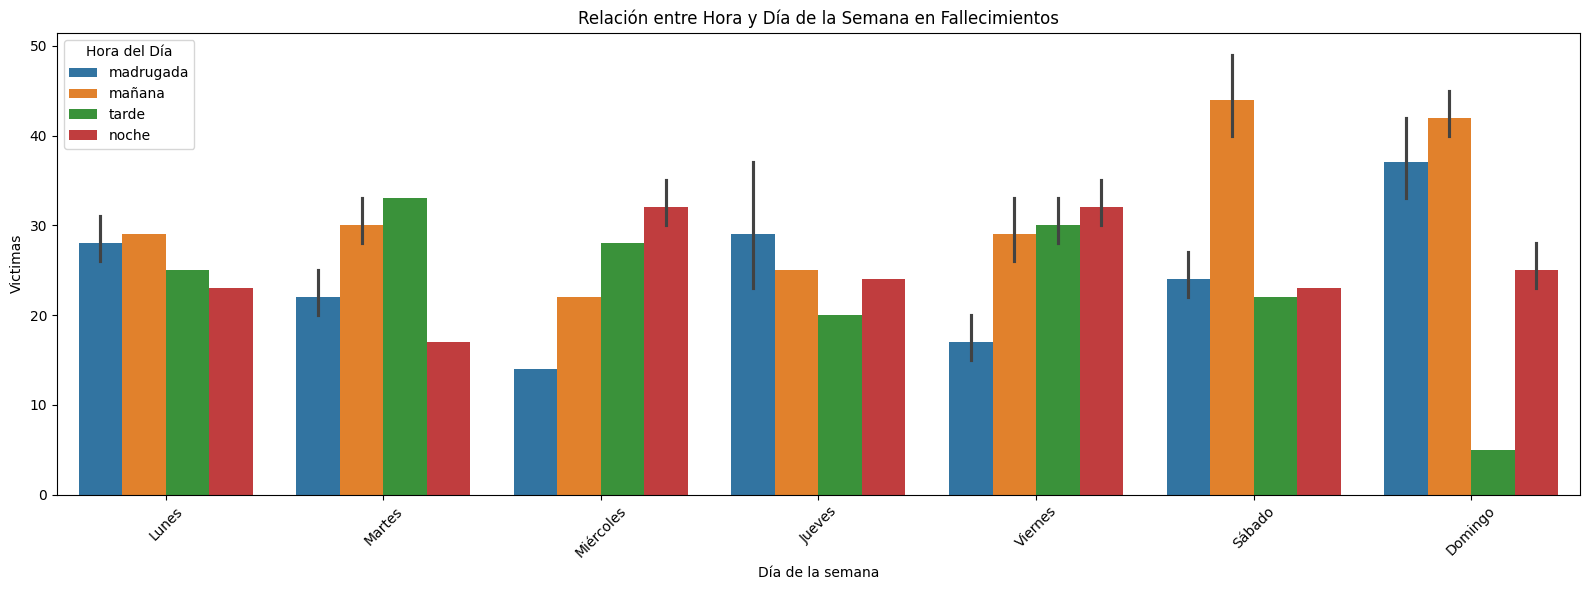

In [33]:
t.RelDiaSemyHora(df)

Este gráfico nos muestra del total de fallecimientos, qué cantidad sucedieron cada día de la semana y en que hora del día. Podemos observar que los días sábado y domingo por la mañana (5-11am) ocurrieron más frecuentemente los siniestros con consecuencias mortales.

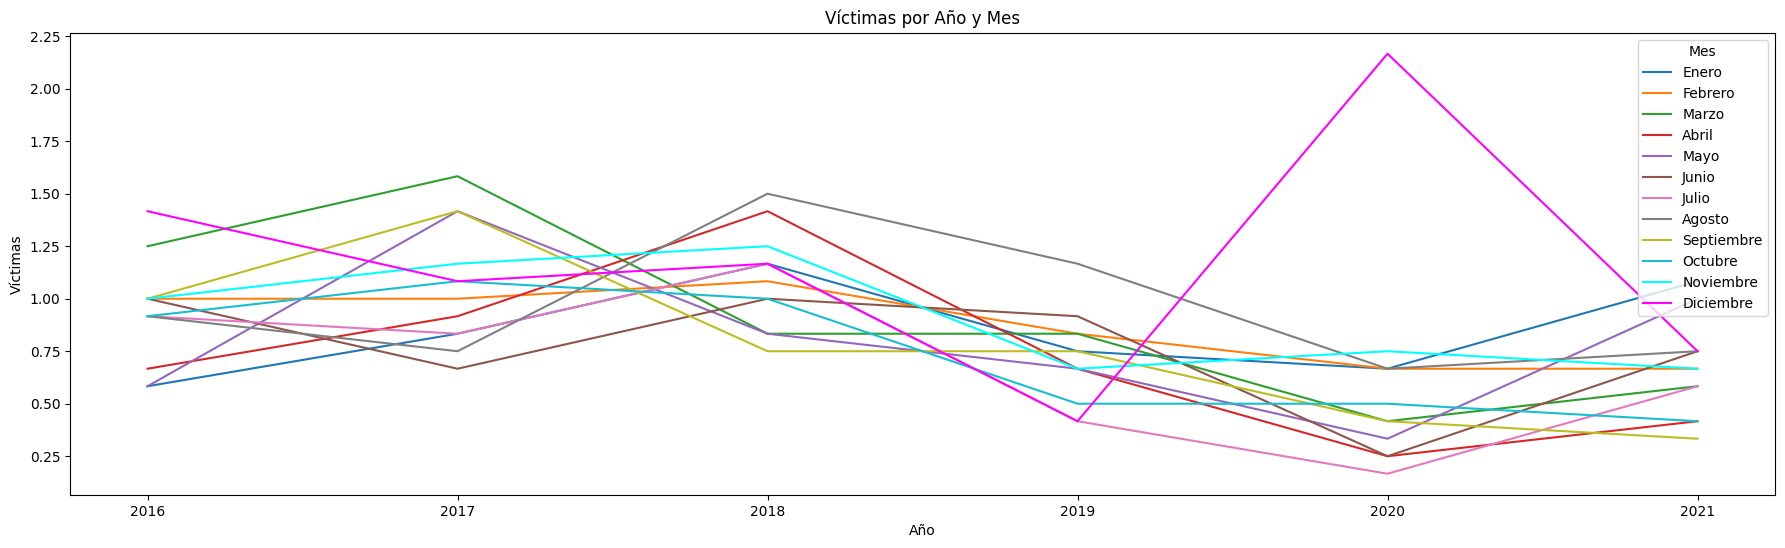

In [34]:
t.VictimasAnioporMes(df)

En esta grafica se representa la cantidad de victimas por mes a través del tiempo, a pesar de que todas se matienen relativamente iguales, se observa un pico en el mes de Diciembre del año 2020, esto se sospecha debido a la Pandemia por Covid-19, ya que se se hacía cuarentena desde marzo de 2020 y en Diciembre es probable que las personas hayan querido festejar con sus amigos y familia tras haber estado encerrados por meses; ocasionando mayor tráfico vial y peatonal llevando nuevamente al alza los accidentes viales.

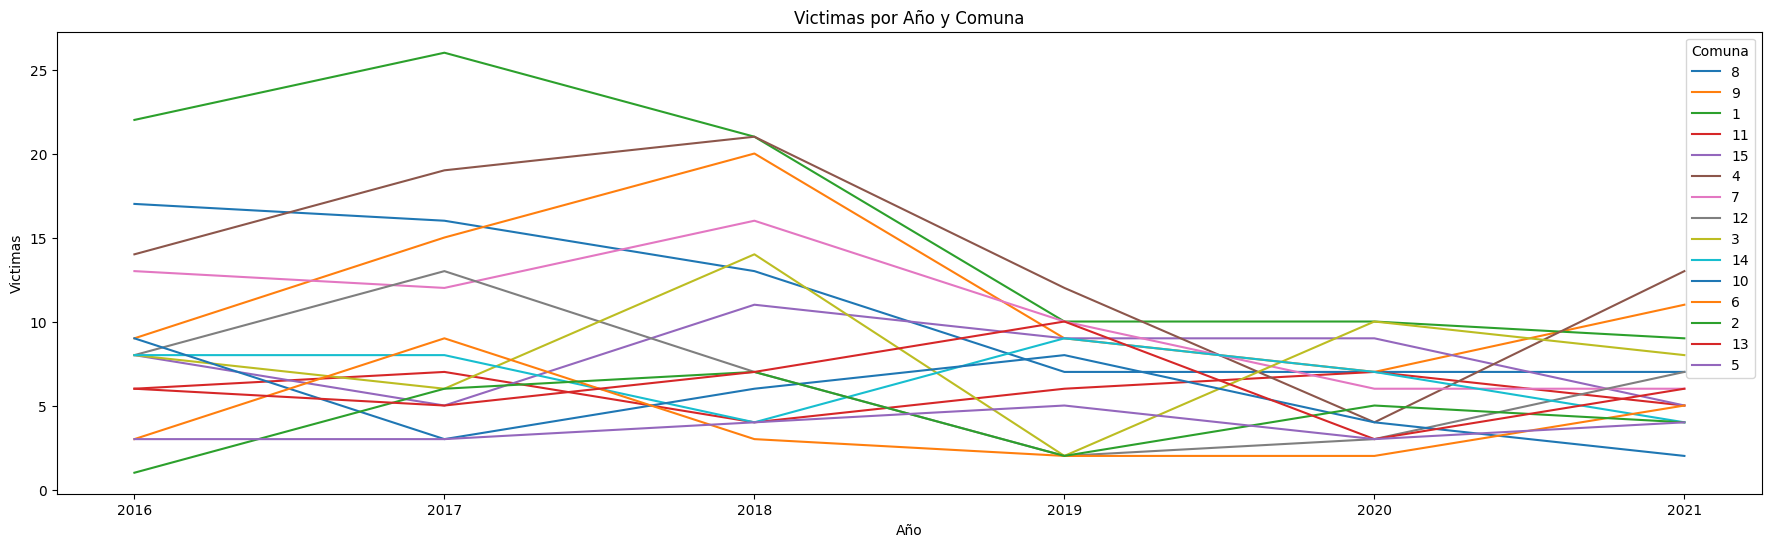

In [35]:
t.VictimaporAnioporComuna(df)

Aqui se presentan la cantidad de victimas fatales por cada Comuna através de los años; se puede apreciar que la Comuna 1 es la que se mantiene por encima de las demás, esto es probable que se deba a que ahí se encuentra el Centro de la ciudad y áreas de tramites gubernamentales, además del turismo que llega a la Ciudad.

Otra cosa interesante de observar es la disminución de las muertes en toda las Comunas apartir del 2019, pasaron de 158 en el 2019 a 87 en el 2020, quiere decir que las muertes por accidientes viales disminuyeron en ese periodo de tiempo un 55%, muy probablemente debido a la Contingencia Sanitaria por Covid-19.

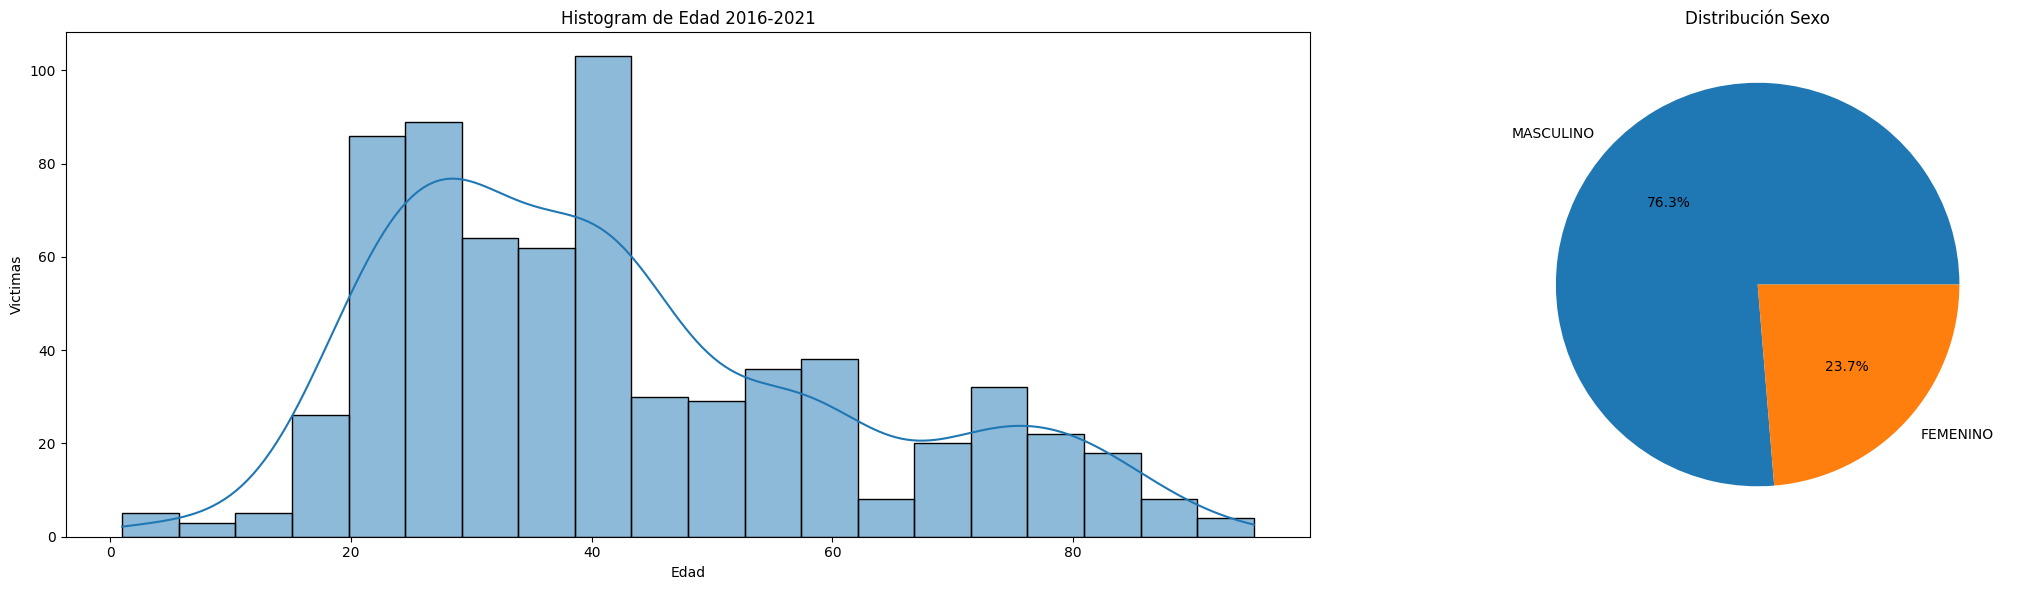

In [36]:
t.EdadySexo(df)

Revisando ahora el perfil demográfico de las victimas, podemos observar en el gráfico de la izquerda, oscilaban entre 20 y 45 años de edad, y que el 76.3% son de sexo mascullino.

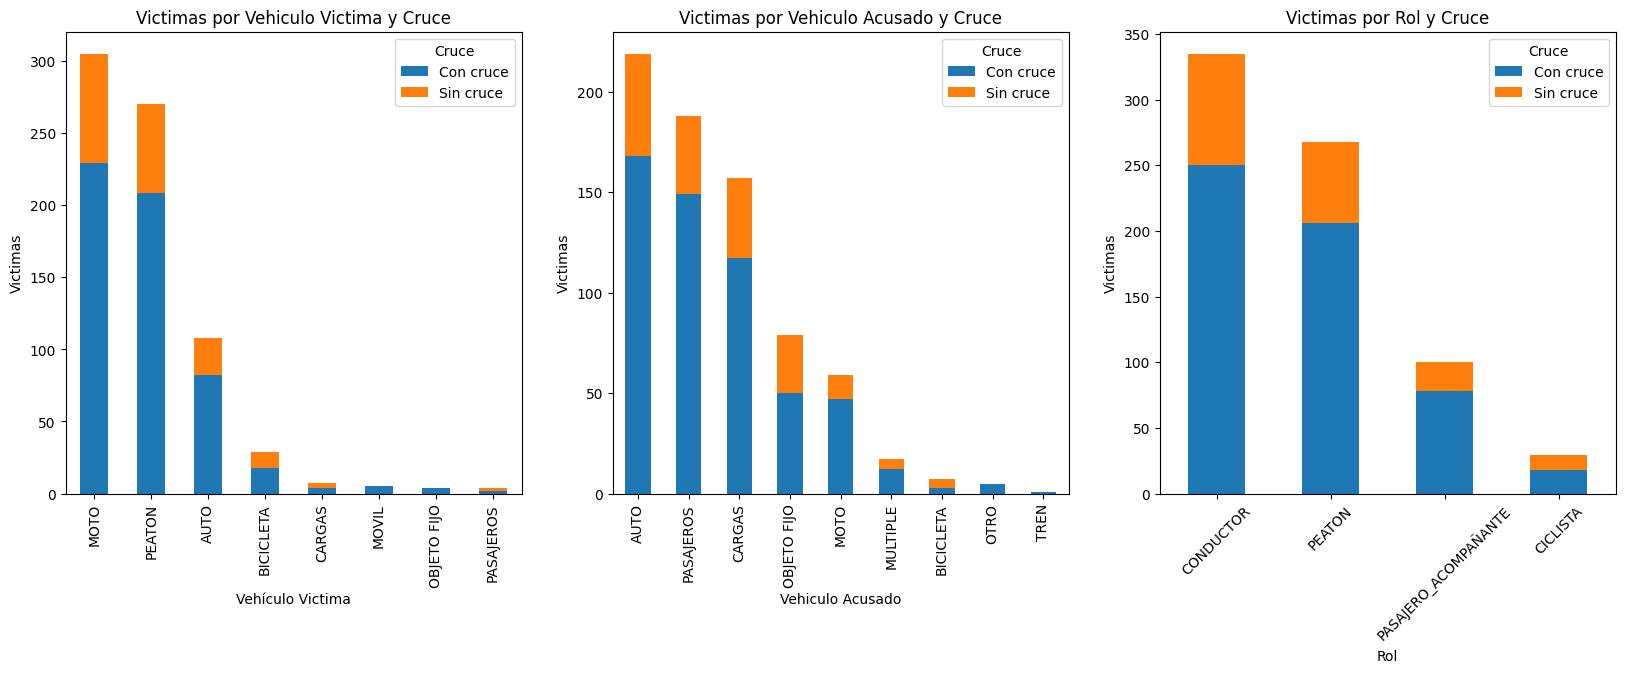

In [37]:
t.NVictimaporAcusadoNVictimaTypeNRol(df)

También podemos mencionar que el 42% de las victimas eran personas que iban en moto, el 37% eran peatones y un 4% eran conductores de un auto.

Por parte del acusado, el 30% de las victimas fallecieron al accidentarse contra un auto, un 25% con vehiculos de pasajeros y un 21% con cargas.

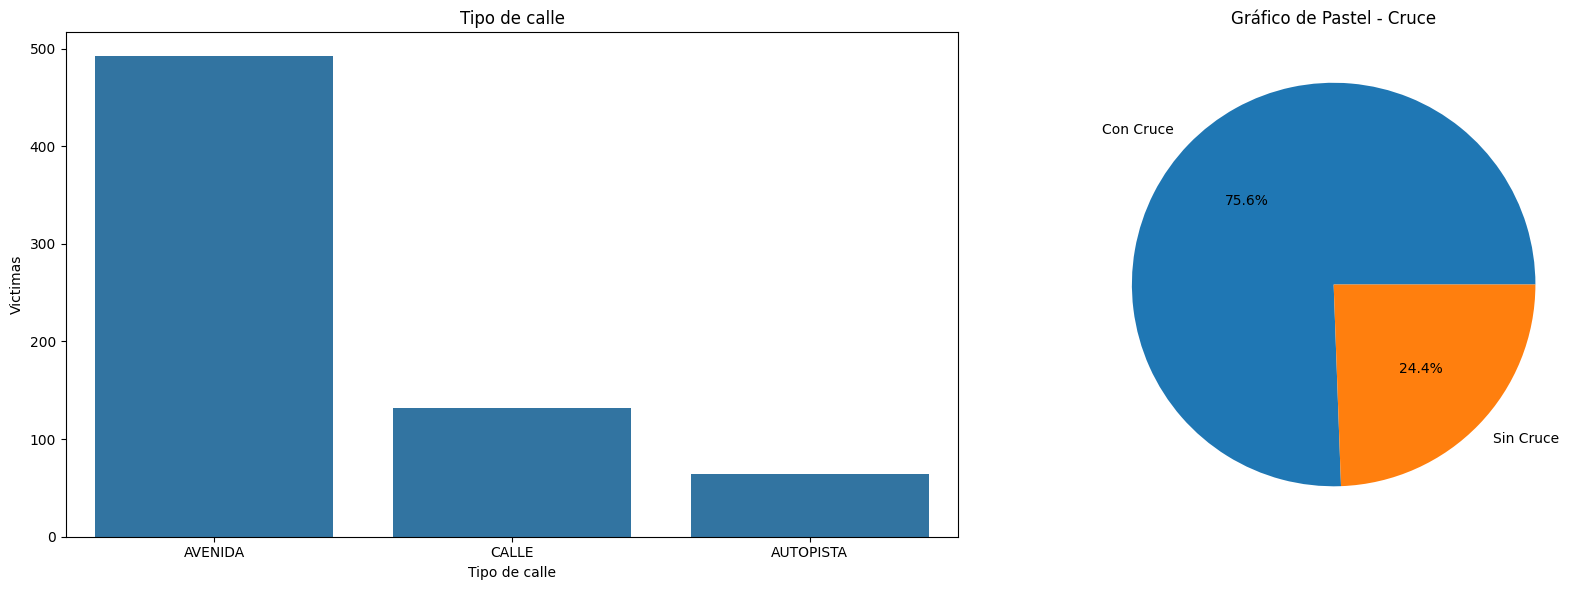

In [38]:
t.CalleNCruce(df)

Continuando sobre la ubicación geográfica de los siniestros, se observa que el 61% de los mismos ocurrió en una Avenida, y que además el 75.6% sucedió en un cruce con otra calle.

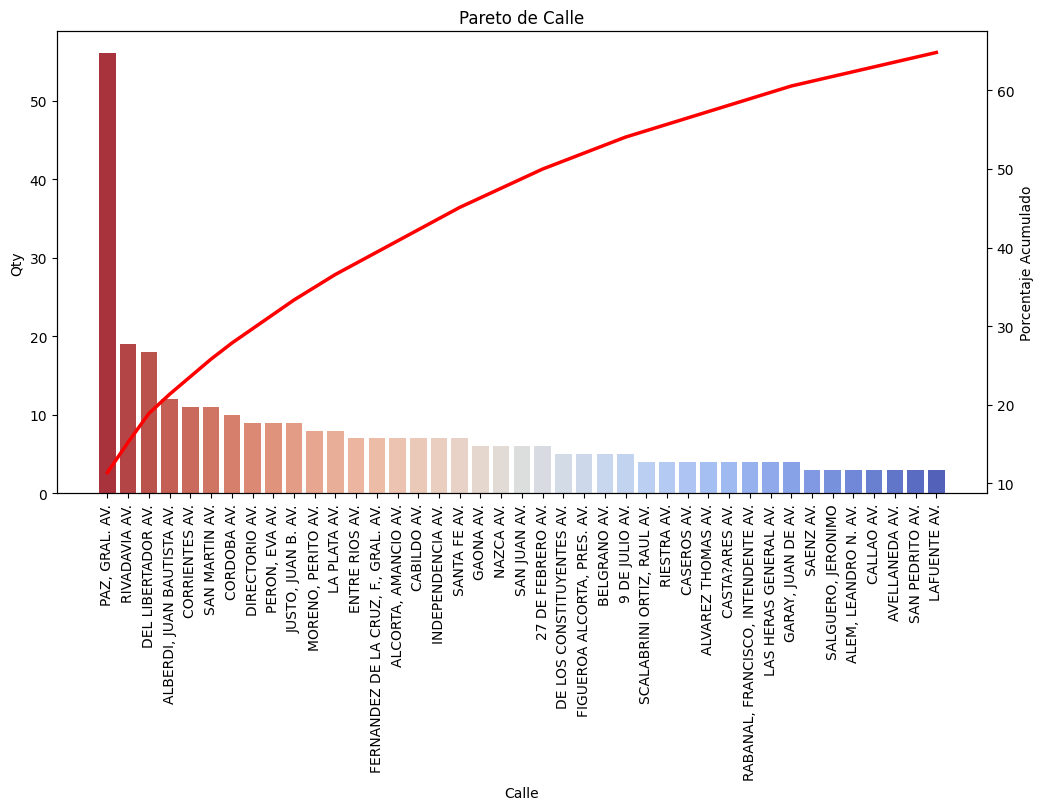

In [39]:
df_avenida = df[df['TipoDeCalle'] == 'AVENIDA']
t.Pareto_calle(df_avenida,'Calle')


En este punto se hizo un gráfico de pareto con las principales Avenidas que más siniestros registraron. La Av. Gral Paz es la avenida con mayor número de siniestros representando un 8.75% del total de los siniestros, seguida por la AV. RIVADAVIA con un 2.9% del total y Av. del Libertador con un 2.7%.

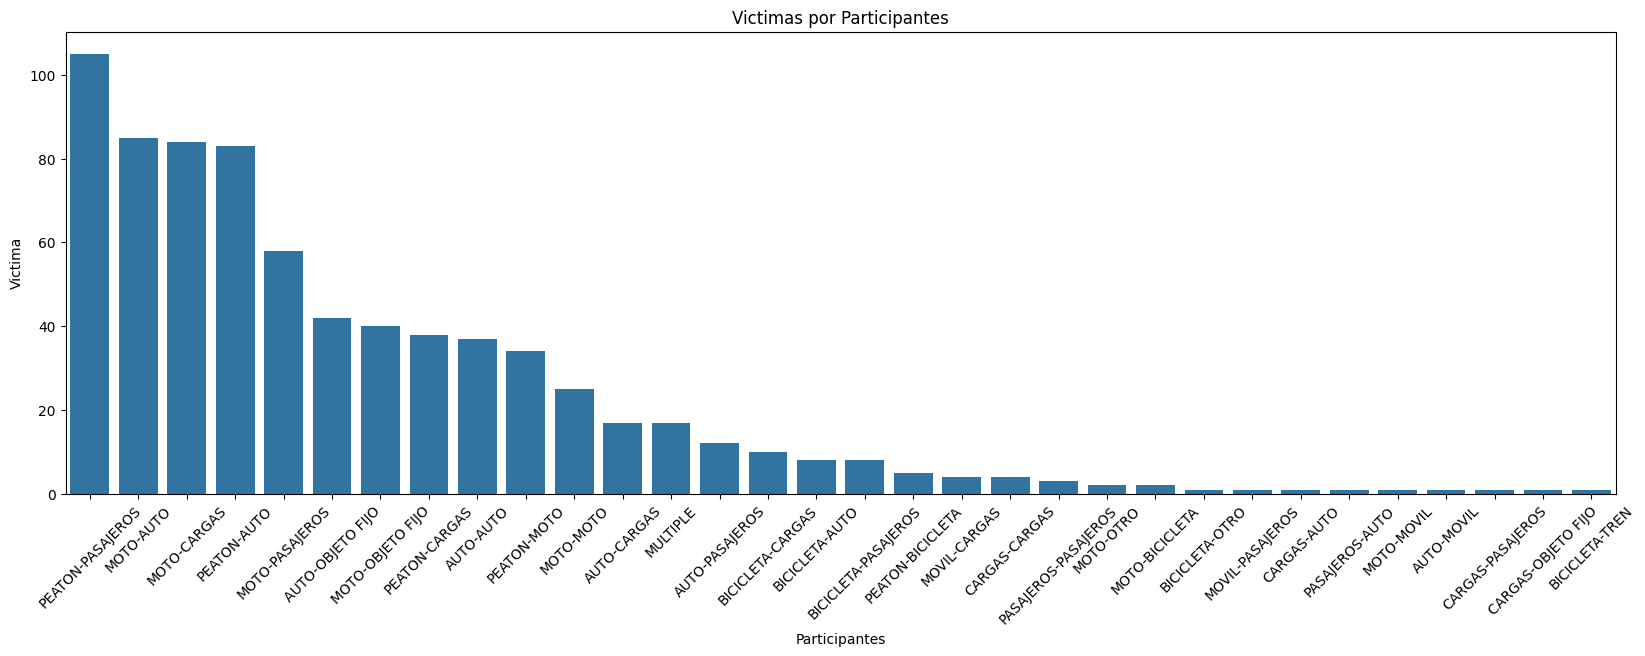

In [40]:
t.VictimasporParticipante(df)

Finalmente la gráfica nos indica que la participación Peaton-Pasajeros que representa un 14% de las fatalidades y que fue la más frecuente en los siniestros, seguida por Moto-Auto con 11.6% y  Moto-Cargas con un 11.4%.

#### KPIs

Se crea un dataframe especifico para el análisis de los KPIs, comenzando agregaremos la columna Semestre para este fin.

In [41]:
df['Semestre'] = df['Mes'].apply(t.Semestre)

Creamos el dataframe

In [42]:
df_2 = pd.merge(df,df_poblacion, on = 'Anio')
resultado = df_2.groupby(['Anio','Semestre','Poblacion'])['NumVictimas'].sum().reset_index()
resultado['Tasa'] = round( resultado['NumVictimas'] / resultado['Poblacion'] *100000 ,2 )
resultado['TasaAnterior'] = round( resultado['Tasa'].shift(periods=1, fill_value=0) ,2 )
resultado['Cambio'] = round(( resultado['Tasa'] - resultado['TasaAnterior'] ) / resultado['TasaAnterior'] *100 ,2 ) 
resultado['Cambio'] = resultado['Cambio'].replace(np.inf, 0)                                                           # The innfinite is replaced by 0
resultado

,Anio,Semestre,Poblacion,NumVictimas,Tasa,TasaAnterior,Cambio
0,2016,1,3059122,61,1.99,0.00,0.00
1,2016,2,3059122,74,2.42,1.99,21.61
2,2017,1,3063728,77,2.51,2.42,3.72
3,2017,2,3063728,76,2.48,2.51,-1.20
4,2018,1,3068043,76,2.48,2.48,0.00
5,2018,2,3068043,82,2.67,2.48,7.66
6,2019,1,3072029,56,1.82,2.67,-31.84
7,2019,2,3072029,47,1.53,1.82,-15.93
8,2020,1,3075646,31,1.01,1.53,-33.99
9,2020,2,3075646,56,1.82,1.01,80.20


Ahora para el KPI de motocicletas

In [43]:
df_3 = df_2[df_2['Victima'] == 'MOTO']
moto = df_3.groupby(['Anio','Poblacion'])['idSiniestro'].nunique().reset_index()
moto = moto.rename(columns={'idSiniestro': 'CantAccidentes'})

moto['AccidentesAnterior'] = moto['CantAccidentes'].shift(periods=1, fill_value=0)
moto['Evolucion'] = round(( moto['AccidentesAnterior'] - moto['CantAccidentes'] ) / moto['AccidentesAnterior'] *100 ,2 ) 

moto['Evolucion'] = moto['Evolucion'].replace(-np.inf, 0)     
moto

,Anio,Poblacion,CantAccidentes,AccidentesAnterior,Evolucion
0,2016,3059122,59,0,0.00
1,2017,3063728,50,59,15.25
2,2018,3068043,54,50,-8.00
3,2019,3072029,48,54,11.11
4,2020,3075646,27,48,43.75
5,2021,3078836,46,27,-70.37


#### Cargar datos

In [44]:
df.to_csv('data/Ahomicidios_limpio.csv', index=False, encoding='utf-8')
resultado.to_csv('data/APoblacionKPI.csv', index=False, encoding='utf-8')
moto.to_csv('data/AMotocicleta.csv', index=False, encoding='utf-8')

Este es el fin del EDA. Puede continuar al Dasboard interactivo en el Repositorio de GitHub para mayor información